# Podział zbioru treningowego i miary jakości

#### Danijel Koržinek <danijel@pja.edu.pl>

Uruchom poniższy blok:

In [162]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Zacznijmy od wczytania zbioru danych z biblioteki `sklearn.datasets`. Zapisz wynik funkcji `load_breast_cancer` do zmiennej:

In [163]:
import sklearn.datasets
data = sklearn.datasets.load_breast_cancer() 

Wypisz wszystkie składowe `keys()` otrzymanego zbioru:

In [164]:
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Zobaczmy składową `DESCR`:

In [165]:
data['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

Jest to zbiór przeznaczony do binarnej klasyfikacji rzeczywistych danych liczbowych. Wypisz nazwy cech (`feature_names`) i klas (`target_names`):

In [166]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


Wypisz rozmiary tablic danych (`data`) i klas (`target`):

In [167]:
import pandas as pd
#data = pd.DataFrame(data= data.data, columns=data.feature_names)
#print(data.shape)
print(data['target'].shape)
print(data['data'].shape)


(569,)
(569, 30)


## Podział danych

Użyj metody `train_test_split` z modułu `sklearn.model_selection` żeby podzielić zbiór na część treningową (90%) i testową (10%). Użyj straktyfikacji w podziale danych:

In [168]:
from sklearn.model_selection import train_test_split


In [169]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.1, stratify = data['target'])

Wczytaj następujące klasyfikatory:

```
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
```

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

Dla każdego klasyfikatora (skonstruowanego domyślnymi parametrami) zastosuj odpowiednio metody `fit` na danych treningowych i `score` na danych testowych żeby otrzymać jego dokładność. Zaleca się zrobić słownik poszczególnych modeli i uruchomić wszystko w pętli `for`. Co się stanie jak zmienimy podział danych (użyjemy metody split ponownie)?

In [171]:
models = [

          ('LR', LogisticRegression()), 

          ('Gauss', GaussianProcessClassifier()),

          ('GNB', GaussianNB()),

          ('KNN', KNeighborsClassifier()),

          ('SVC', SVC()), 

          ('SGD', SGDClassifier()),

          ('MLP', MLPClassifier())

        ]

for name, model in models:

  clf = model.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Score of model",name,": ", clf.score(X_test, y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Score of model LR :  0.9122807017543859
Score of model Gauss :  0.9473684210526315
Score of model GNB :  0.9649122807017544
Score of model KNN :  0.9122807017543859
Score of model SVC :  0.9122807017543859
Score of model SGD :  0.8596491228070176
Score of model MLP :  0.8947368421052632


In [172]:
models[1]


('Gauss', GaussianProcessClassifier())

In [173]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.1, stratify = data['target'])

models = [

          ('LR', LogisticRegression()), 

          ('Gauss', GaussianProcessClassifier()),

          ('GNB', GaussianNB()),

          ('KNN', KNeighborsClassifier()),

          ('SVC', SVC()), 

          ('SGD', SGDClassifier()),

          ('MLP', MLPClassifier())

        ]

for name, model in models:

  clf = model.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Score of model",name,": ", clf.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Score of model LR :  0.9298245614035088
Score of model Gauss :  0.8771929824561403
Score of model GNB :  0.9122807017543859
Score of model KNN :  0.8596491228070176
Score of model SVC :  0.8245614035087719
Score of model SGD :  0.8421052631578947
Score of model MLP :  0.8771929824561403


Po zastosowaniu ponownego podziału danych zauważalne są inne rezultaty wynków poszczególnych modeli.

## Walidacja krzyżowa

Przy niewielkim zbiorze danych, ciężko jest wydzielić reprezentatywny zbiór testowy. Jeden ze sposobów jest uruchomić cały proces kilka razy i raportować średnie i odchylenia uzyskanych wyników.

Lepszym sposobem jest podzielić cały zbiór danych na `K` paczek i iteracyjnie użyć każdej paczki jako dane testowe, a wszystkie inne (w każdej iteracji) jako dane treningowe.

Użyj klasy `StratifiedKFold` z modułu `sklearn.model_selection` żeby podzielić zbiór na 5 części i powtórz poprzedni eksperyment do liczenia dokładności modeli. Jako wynik podaj wartość średnią i odchylenie standardowe dla wsyzstkich podziałów danego modelu.

In [174]:
import numpy as np
from sklearn.model_selection import KFold
import statistics
import pandas as pd

X = data['data']
y = data['target']
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
model = LogisticRegression()
namex = []
op = []
op2=[]
op3 = []
names = []
for name, model in models: 
  for train_index, test_index in kf.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = model.fit(X_train, y_train)
    y_pred = clf.score(X_test,y_test)
    op.append(y_pred)
  op2.append(mean(op))
  op3.append(statistics.stdev(op))
  namex.append(name)
#print("mean of model:",mean(op),"st of model:"statistics.stdev(op))
#print(op2)
#print(op3)
# Create DataFrame

df = pd.DataFrame([op2,op3], index =['mean','SD'])
 

df.columns =[namex]

print(df)

KFold(n_splits=5, random_state=None, shuffle=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


            LR     Gauss       GNB       KNN       SVC       SGD       MLP
mean  0.945536  0.926199  0.929721  0.928843  0.924459  0.916548  0.915674
SD    0.023495  0.034397  0.034760  0.035172  0.045971  0.046501  0.044510


- Każdy z klasyfikatorów uzyskał średnią wyników powyżej 0.9
- Najlepsze dopasowanie wydaje się mieć regresja logistyczna, najgorszy SGD.
- LR z odchyleniem standardowym na poziomie 0.02, natomiast SGD i MLP powyżej 0.08 (prawie 4-ktornie wyższe)

Naturalnym pytaniem jest jaką wartość wybrać dla parametru `K`. Im więcej paczek użyjemy, tym większa wariancja w wynikach. Dużo paczek oznacza mniejsze ryzyko biasu w eksperymentach, ale testy są robione na mniejszej ilości danych i przez to są bardziej chaotyczne. Mniej paczek oznacza bardziej dokładne wyniki testów, ale jest ryzyko że dane w ustalonych podziałach będa mniej reprezentatywne dla ogółu problemu. W skrajnym przypadku możemy użyć tyle paczek ile jest próbek - ta metoda nazywa się Leave-One-Out.

Powtórz te same eksperymenty co poprzednio używając klasy `LeaveOneOut`, ale dla osczędności czasu użyj tylko jednego klasyfikatora (np SVC):

In [175]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
model = SVC()
op = []
LeaveOneOut()
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     clf = model.fit(X_train, y_train)
     y_pred = clf.score(X_test,y_test)
     op.append(y_pred)
#print(len(op))
print("Mean for SVC in LOO:",mean(op),"SD for SVC in LOO:", statistics.stdev(op))


Mean for SVC in LOO: 0.9121265377855887 SD for SVC in LOO: 0.2833598931225475


- Uzyskaliśmy średnią dla algorytmu SVC nieco niższą niż przy Kfold dla 5 paczek.
- Wzrosło nam diametralnie odchylenie standardowe z poziomu 0.045 do 0.28. Powodem jest ilość paczek/próbek

## Miary jakości modelu

Wczytaj następujące metody:
```
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
```

Zrób zwykły podział train/test 90/10. Dla wszystkich modeli oprócz regresji liniowej, zastosuj odpowiednio metody `fit` na danych treningowych i `predict` na danych testowych. Potem policz odpowiednio dokładność (`accuracy_score`), precyzję (`precision`), czułóść (`recall`), f-score i macierz konfuzji dla poszczególnych klasyfikatorów. Użyj też metody `classification_report` żeby zobaczyć ogólny raport:

In [176]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
models = [
          ('GSP', GaussianProcessClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('GNB', GaussianNB()),
          ('MLP', MLPClassifier()),
           ('SGD',SGDClassifier())]
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.1, stratify = data['target'])
for name, model in models:

  clf = model.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  print(name)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  #print(accuracy_score(y_test, y_pred))
  #print("Score of model",name,": ", clf.score(X_test, y_test))



GSP
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.89      0.94      0.92        36

    accuracy                           0.89        57
   macro avg       0.89      0.88      0.88        57
weighted avg       0.89      0.89      0.89        57

[[17  4]
 [ 2 34]]
KNN
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.87      0.94      0.91        36

    accuracy                           0.88        57
   macro avg       0.88      0.85      0.86        57
weighted avg       0.88      0.88      0.87        57

[[16  5]
 [ 2 34]]
SVC
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.83      0.97      0.90        36

    accuracy                           0.86        57
   macro avg       0.88      0.82      0.84        57
weighted avg       0.87 

GNB uzyskało najlepsze statystyki miar

## ROC i AUC

Użyj wszystkich modeli oprócz regresji liniowej i GPC, a dla SVC dodaj parametr `probability=True`. Użyj walidacji krzyżowej żeby wytrenować każdy z modeli i policzyć `predict_proba` dla całego zbioru. Potem policz `roc_curve` i `auc_score` dla wszystkich modeli i narysuj na wykresie. 

Najpierw użyj tych poleceń żeby otrzymać pusty wykres ROC:

```
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')
```

Dla każdego klasyfikatora użyj metody `plot` żeby narysować wartości `x=fpr` i `y=tpr` z metody `roc_curve`, a jako `label` ustaw nazwę modelu i jego `AUC`. Na końcu uruchom metodę `legend(loc='lower right')` żeby narysować legendę w dolnym prawym rogu wykresu.

In [177]:
models = [
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC(probability=True)), 
          ('GNB', GaussianNB()),
          ('MLP', MLPClassifier()),
           ('SGD',SGDClassifier(loss='modified_huber',class_weight='balanced'))]
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5, random_state=None, shuffle=False)
namex = []
op = []
op2=[]
op3 = []
names = []
for name, model in models: 
  for train_index, test_index in kf.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = model.fit(X_train, y_train)
    
  op.append(clf.predict_proba(X_test))
    #op.append(y_pred)
  #op2.append(mean(op))
  #op3.append(statistics.stdev(op))
  namex.append(name)
  
#print("mean of model:",mean(op),"st of model:"statistics.stdev(op))

# Create DataFrame

#df = pd.DataFrame([op2,op3], index =['mean','SD'])
 

#df.columns =[namex]
#op
#print(df)

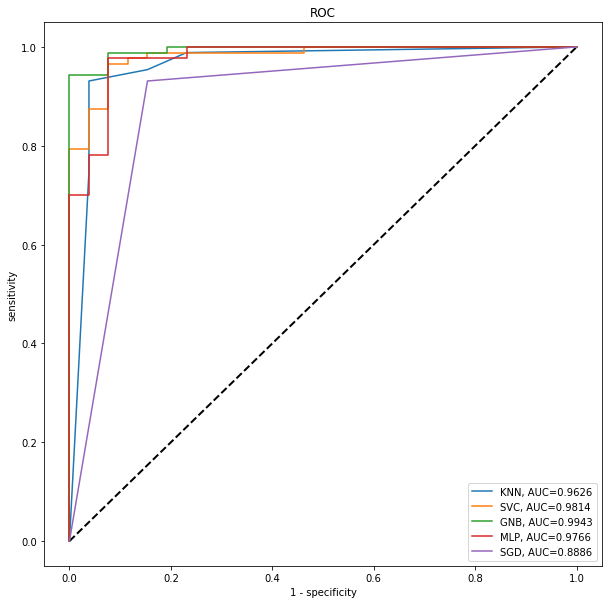

In [178]:
figure(figsize=(10,10))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')
for i in range(0,5):
  k=op[i]
  lr_probs = k[:, 1]
  lr_probs 
  lr_auc = round(roc_auc_score(y_test, lr_probs),4)
  #print(lr_auc)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

  # plot the roc curve for the model



  
  #pyplot.plot(lr_fpr, lr_tpr, marker='.', label=namex[i])
  plt.plot(lr_fpr, lr_tpr,label=namex[i]+", AUC="+str(lr_auc))
  
  plt.legend()
pyplot.show()

- Wszystkie klasyfikatory oprócz SGD radzą sobie bardzo dobrze
- Po wykresie ROC i wartości AUC widzimy że najlepiej radzi sobie GNB. Wskazywał również na to classification_report

# Zadanie 1. -- Klasyfikacja wieloetykietowa

Powtórz powyższe zadania na zbiorze danych win uzyskanego metodą `load_wine` z modułu `sklearn.datasets`. Warto zwrócić uwagę, że ten zbiór definiuje 3 różne klasy.

Użyj `sklearn.multiclass.OneVsRestClassifier` żeby zastosować poprzednie klasyfikatory na nowych danych.

Przy liczeniu krzywy ROC i wartości AUC użyj `sklearn.preprocessing.label_binarize` na referncji i metody `ravel()` na macierzach wyjściowych przed narysowaniem.

In [187]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import label_binarize
data = load_wine()
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [188]:
from sklearn.multiclass import OneVsRestClassifier
models = [

          ('LR', LogisticRegression()), 

          ('Gauss', GaussianProcessClassifier()),

          ('GNB', GaussianNB()),

          ('KNN', KNeighborsClassifier()),

          ('SVC', SVC()), 

          ('SGD', SGDClassifier()),

          ('MLP', MLPClassifier())

        ]


In [189]:
import numpy as np
from sklearn.model_selection import KFold
import statistics
import pandas as pd

X = data['data']
y = data['target']
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
model = LogisticRegression()
namex = []
op = []
op2=[]
op3 = []
names = []
for name, model in models: 
  for train_index, test_index in kf.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = OneVsRestClassifier(model).fit(X_train, y_train)
    y_pred = clf.score(X_test,y_test)
    op.append(y_pred)
  op2.append(mean(op))
  op3.append(statistics.stdev(op))
  namex.append(name)
#print("mean of model:",mean(op),"st of model:"statistics.stdev(op))
#print(op2)
#print(op3)
# Create DataFrame

df = pd.DataFrame([op2,op3], index =['mean','SD'])
 

df.columns =[namex]

print(df)

KFold(n_splits=5, random_state=None, shuffle=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


            LR     Gauss       GNB       KNN       SVC       SGD       MLP
mean  0.933016  0.661746  0.755873  0.715357  0.690762  0.610450  0.559161
SD    0.042028  0.334471  0.302231  0.306090  0.312504  0.354803  0.377315


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [190]:
loo = LeaveOneOut()
loo.get_n_splits(X)
model = SVC()
op = []
LeaveOneOut()
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     clf = OneVsRestClassifier(model).fit(X_train, y_train)
     y_pred = clf.score(X_test,y_test)
     op.append(y_pred)
#print(len(op))
print("Mean for SVC in LOO:",mean(op),"SD for SVC in LOO:", statistics.stdev(op))


Mean for SVC in LOO: 0.6853932584269663 SD for SVC in LOO: 0.46566896459508955


In [191]:
models = [
          ('GSP', GaussianProcessClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('GNB', GaussianNB()),
          ('MLP', MLPClassifier()),
           ('SGD',SGDClassifier())]
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.1, stratify = data['target'])
for name, model in models:

  clf = OneVsRestClassifier(model).fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  print(name)
  print(classification_report(y_test, y_pred))
  print("Confusion matrix:")
  print(confusion_matrix(y_test, y_pred))
  #print(accuracy_score(y_test, y_pred))
  #print("Score of model",name,": ", clf.score(X_test, y_test))



GSP
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      0.43      0.55         7
           2       0.33      0.80      0.47         5

    accuracy                           0.50        18
   macro avg       0.69      0.52      0.51        18
weighted avg       0.72      0.50      0.51        18

Confusion matrix:
[[2 0 4]
 [0 3 4]
 [0 1 4]]
KNN
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.50      0.57      0.53         7
           2       0.17      0.20      0.18         5

    accuracy                           0.50        18
   macro avg       0.56      0.48      0.51        18
weighted avg       0.57      0.50      0.52        18

Confusion matrix:
[[4 0 2]
 [0 4 3]
 [0 4 1]]
SVC
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.70  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.58      1.00      0.74         7
           2       0.00      0.00      0.00         5

    accuracy                           0.67        18
   macro avg       0.47      0.61      0.52        18
weighted avg       0.50      0.67      0.56        18

Confusion matrix:
[[5 1 0]
 [0 7 0]
 [1 4 0]]
SGD
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.55      0.86      0.67         7
           2       0.00      0.00      0.00         5

    accuracy                           0.61        18
   macro avg       0.42      0.56      0.48        18
weighted avg       0.45      0.61      0.52        18

Confusion matrix:
[[5 1 0]
 [1 6 0]
 [1 4 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and

In [192]:
from sklearn.preprocessing import label_binarize

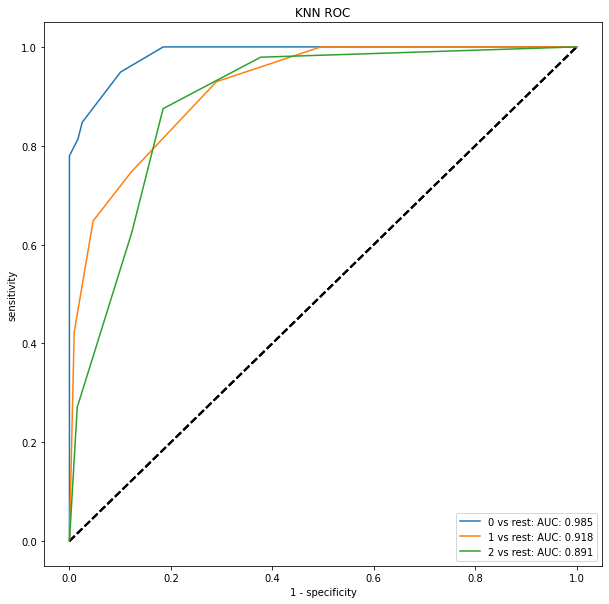

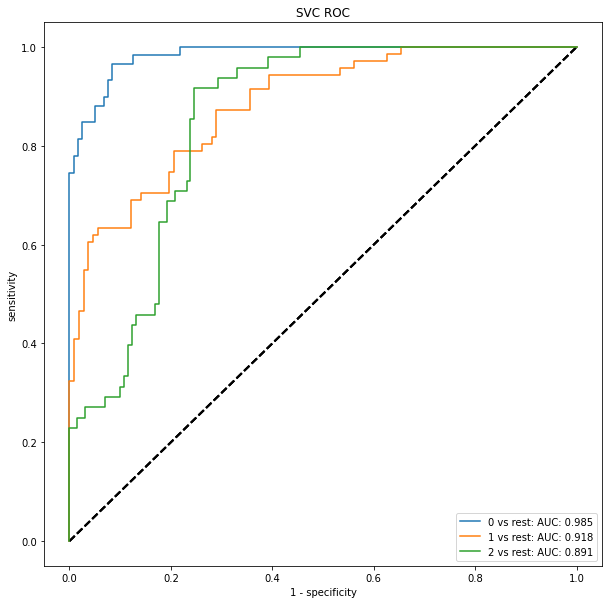

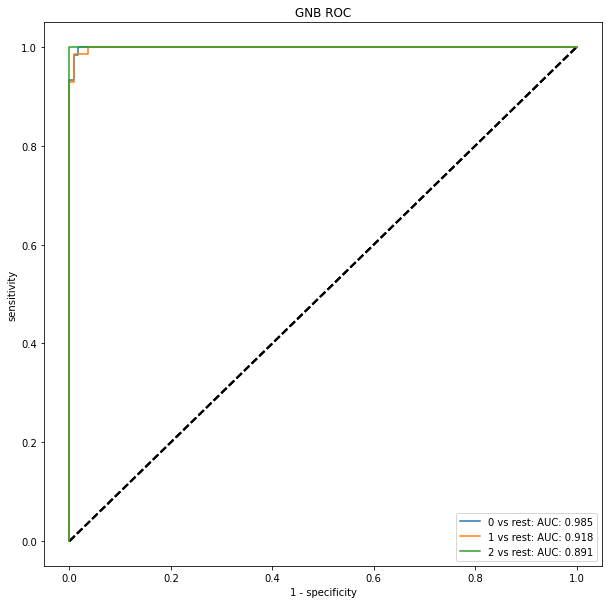

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


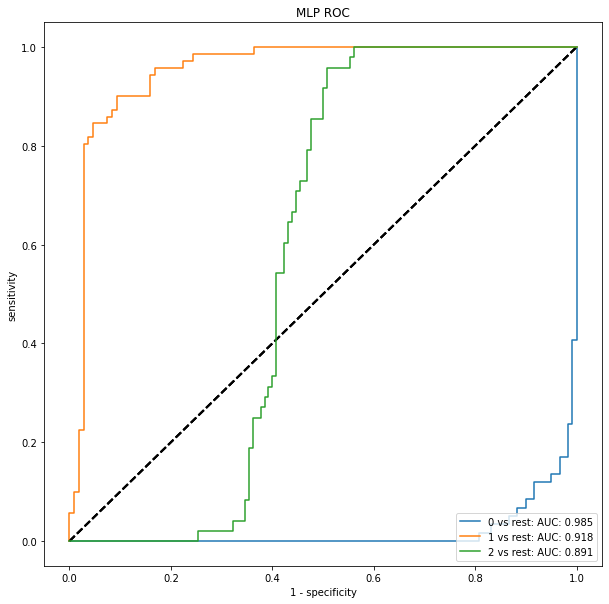

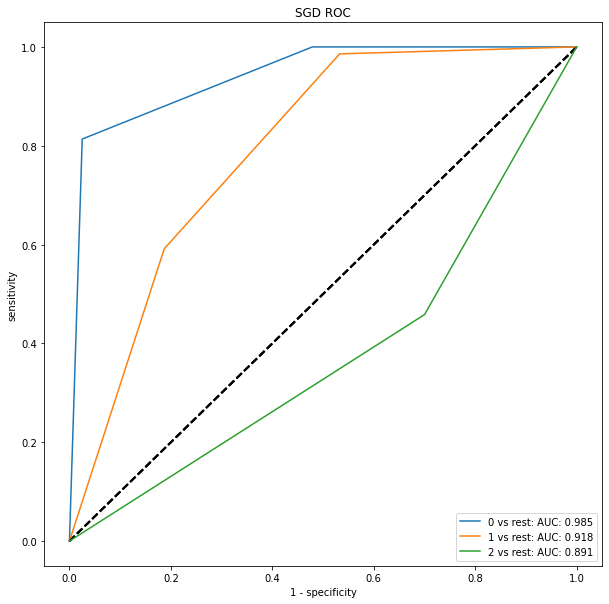

In [193]:

X_train, X_val, y_train, y_val = train_test_split(data['data'], data['target'], train_size=0.9, test_size=0.1, stratify =data['target'])
a1 = []
models = [
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC(probability=True)), 
          ('GNB', GaussianNB()),
          ('MLP', MLPClassifier()),
           ('SGD',SGDClassifier(loss='modified_huber',class_weight='balanced'))]

roc_aucs = []
fpr = {}
tpr = {}
thresh = {}



X_train, X_val, y_train, y_val = train_test_split(data['data'], data['target'], train_size=0.9, test_size=0.1, stratify =data['target'])

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)
pred = model.predict_proba(data['data'])
roc_aucs = []
fpr = {}
tpr = {}
thresh = {}
for i in range(0,5):
  figure(figsize=(10,10))
  model1 = OneVsRestClassifier(models[i][1])
  model1.fit(X_train, y_train)
  pred = model1.predict_proba(data['data'])
  #a1.append(models[i][0])
  a1 = models[i][0]
  for i in range(3):   
      
      fpr[i], tpr[i], thresh[i] = roc_curve(label_binarize(data['target'], classes=[0,1,2])[:,i], pred[:,i])
      roc_aucs.append(roc_auc_score(label_binarize(data['target'], classes=[0,1,2])[:,i], pred[:,i]))
      plot([0,1],[0,1],color='black',lw=2,linestyle='--')
      plot(fpr[i], tpr[i],label=f"{i} vs rest: AUC: {round(roc_aucs[i], 3)}")
  xlabel('1 - specificity')
  ylabel('sensitivity')
  title(a1+f' ROC')
  legend(loc='lower right')

  show()

Przy każdym z klasyfikatorów widzimiy konsekwentną skutecznośc seperacji klasy "0", następnie klasy "1" i najsłabiej zachowuje się klasa "2".

# Zadanie 2. -- Optymalizacja hiperparametru

Użyj podwójnej walidacji krzyżowej żeby znaleźć średnią skuteczność klasyfikatora SVC (na danych `load_breast_cancer`) dla optymalnego parametru `C`.

Należy użyć podwójnej metody K-Fold: najpierw dzielimy zbiór na train/test, a potem w każdej iteracji zbiór train dodatowko dzielimy na train/dev kolejną pętlą walidacji krzyżowej. Za pomocą podziału train/dev szukamy jaki parametr `C` daje najlepszy wynik (załóżmy że przetestujemy ~10 różnych wartości równomiernie rozłożonych od 0.2 do 2 ), a potem użyjemy tą optymalną wartość żeby dokonać eksperymentu na zbiorze test.

In [194]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

In [195]:
data = load_breast_cancer()
skf = StratifiedKFold()
skf.get_n_splits(data['data'], data['target'])
exps = [[] for _ in range(len(models))]
Cs = [i/10 for i in list(range(2,22,2))]
results = {}

for exp_id, (train_dev_idxs, test_idxs) in enumerate(skf.split(data['data'], data['target'])):
    X_test, y_test = data['data'][test_idxs], data['target'][test_idxs]
    skf_1 = StratifiedKFold(n_splits=len(Cs))
    skf_1.get_n_splits(data['data'][train_dev_idxs], data['target'][train_dev_idxs])
    for exp_id_1, (train_idxs, dev_idxs) in enumerate(skf_1.split(data['data'][train_dev_idxs], data['target'][train_dev_idxs])):
            X_train, y_train = data['data'][train_idxs], data['target'][train_idxs]
            X_dev, y_dev = data['data'][dev_idxs], data['target'][dev_idxs]
            model = SVC(C=Cs[exp_1])
            model.fit(X_train, y_train)
            results[Cs[exp_id_1]] = model.score(X_dev, y_dev)
    C_value = {v:k for k,v in results.items()}[max(results.values())]
    model = SVC(C=C_value)
    X_train, y_train = data['data'][train_dev_idxs], data['target'][train_dev_idxs]
    model.fit(X_train, y_train)
    print(f"Experiment: {exp_id}. Model score: {model.score(X_test, y_test)} C value: {C_value}")

Experiment: 0. Model score: 0.8508771929824561 C value: 1.0
Experiment: 1. Model score: 0.8947368421052632 C value: 1.0
Experiment: 2. Model score: 0.9298245614035088 C value: 2.0
Experiment: 3. Model score: 0.9385964912280702 C value: 2.0
Experiment: 4. Model score: 0.9380530973451328 C value: 1.0


Najwyższe wyniki skuteczności uzyskaliśmy w eksperymentach nr 2 i 3 dla C równego 2.